# LBF5x5-n2-f3-static-v2 Heuristic policies analysis 

In [4]:
import os.path as osp
from typing import List, Any, Optional, Tuple, Callable
from itertools import permutations, product

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import posggym_agents
import posggym_agents.exp.plot_utils as policy_plot_utils

from baposgmcp.run import plot_utils
from baposgmcp.config import BASE_REPO_DIR

baposgmcp_results_file = osp.join(
    BASE_REPO_DIR, "experiments", "lbf", "LBF5x5-n2-f3-static-v2", "results", "heuristic_results_v1.csv"
)
policy_results_file = osp.join(
    posggym_agents.config.BASE_DIR, 'agents', "lbf5x5_n2_f3_static_v2", "results", "heuristic_pairwise_results.csv"
)

## Loading Heuristic Policy Data

In [5]:
policy_df = plot_utils.import_results(
    policy_results_file, clean_policy_id=True
)
policy_df.columns

policy_ids = policy_df["policy_id"].unique().tolist()
policy_ids.sort()
print(policy_ids)

['heuristic1-v0', 'heuristic2-v0', 'heuristic3-v0', 'heuristic4-v0']


## Loading BAPOSGMCP Data

In [6]:
baposgmcp_df = plot_utils.import_results(
    baposgmcp_results_file, clean_policy_id=True
)
policy_ids = baposgmcp_df["policy_id"].unique().tolist()
policy_ids.sort()
print("Policies")
print("--------")
for pi_id in policy_ids:
    print("  ", pi_id)

print("\nColumns")
print("-------")
for c in baposgmcp_df.columns:
    print("  ", c)

Policies
--------
   POMetaRollout_pucb_1024
   POMetaRollout_pucb_128
   POMetaRollout_pucb_2048
   POMetaRollout_pucb_32
   POMetaRollout_pucb_512
   POMetaRollout_pucb_8
   POMetaRollout_ucb_1024
   POMetaRollout_ucb_128
   POMetaRollout_ucb_2048
   POMetaRollout_ucb_32
   POMetaRollout_ucb_512
   POMetaRollout_ucb_8
   POMetaRollout_uniform_1024
   POMetaRollout_uniform_128
   POMetaRollout_uniform_2048
   POMetaRollout_uniform_32
   POMetaRollout_uniform_512
   POMetaRollout_uniform_8
   POMeta_1024
   POMeta_128
   POMeta_2048
   POMeta_32
   POMeta_512
   POMeta_8
   baposgmcp_1024
   baposgmcp_128
   baposgmcp_2048
   baposgmcp_32
   baposgmcp_512
   baposgmcp_8
   baposgmcp_ucb_1024
   baposgmcp_ucb_128
   baposgmcp_ucb_2048
   baposgmcp_ucb_32
   baposgmcp_ucb_512
   baposgmcp_ucb_8
   heuristic1-v0
   heuristic2-v0
   heuristic3-v0
   heuristic4-v0
   metabaseline

Columns
-------
   Unnamed: 0.1
   Unnamed: 0
   exp_id
   agent_id
   env_name
   exp_seed
   num_episodes
   

## Combine data

In [7]:
# First need to update exp_ids of one dataframe so there are no duplicate exp_ids
df1 = baposgmcp_df
df2 = policy_df

df1_max_exp_id = df1["exp_id"].max()
if df2["exp_id"].min() <= df1_max_exp_id:
    df2["exp_id"] += df1_max_exp_id+1

combined_df = pd.concat([baposgmcp_df, policy_df]).reset_index(drop = True)
    
policy_ids = combined_df["policy_id"].unique().tolist()
policy_ids.sort()
print("Policies")
print("--------")
for pi_id in policy_ids:
    print("  ", pi_id)

print("\nColumns")
print("-------")
for c in baposgmcp_df.columns:
    print("  ", c)

Policies
--------
   POMetaRollout_pucb_1024
   POMetaRollout_pucb_128
   POMetaRollout_pucb_2048
   POMetaRollout_pucb_32
   POMetaRollout_pucb_512
   POMetaRollout_pucb_8
   POMetaRollout_ucb_1024
   POMetaRollout_ucb_128
   POMetaRollout_ucb_2048
   POMetaRollout_ucb_32
   POMetaRollout_ucb_512
   POMetaRollout_ucb_8
   POMetaRollout_uniform_1024
   POMetaRollout_uniform_128
   POMetaRollout_uniform_2048
   POMetaRollout_uniform_32
   POMetaRollout_uniform_512
   POMetaRollout_uniform_8
   POMeta_1024
   POMeta_128
   POMeta_2048
   POMeta_32
   POMeta_512
   POMeta_8
   baposgmcp_1024
   baposgmcp_128
   baposgmcp_2048
   baposgmcp_32
   baposgmcp_512
   baposgmcp_8
   baposgmcp_ucb_1024
   baposgmcp_ucb_128
   baposgmcp_ucb_2048
   baposgmcp_ucb_32
   baposgmcp_ucb_512
   baposgmcp_ucb_8
   heuristic1-v0
   heuristic2-v0
   heuristic3-v0
   heuristic4-v0
   metabaseline

Columns
-------
   Unnamed: 0.1
   Unnamed: 0
   exp_id
   agent_id
   env_name
   exp_seed
   num_episodes
   

## Pairwise performance by number of simulations

Here we look at the performance of each policy against each other policy including BAPOSGMCP using different number of simulations.

<__array_function__ internals>:180: UserWarning: Warning: converting a masked element to nan.
/home/jonathon/miniconda3/envs/ba-posgmcp/lib/python3.8/site-packages/matplotlib/colors.py:1211: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


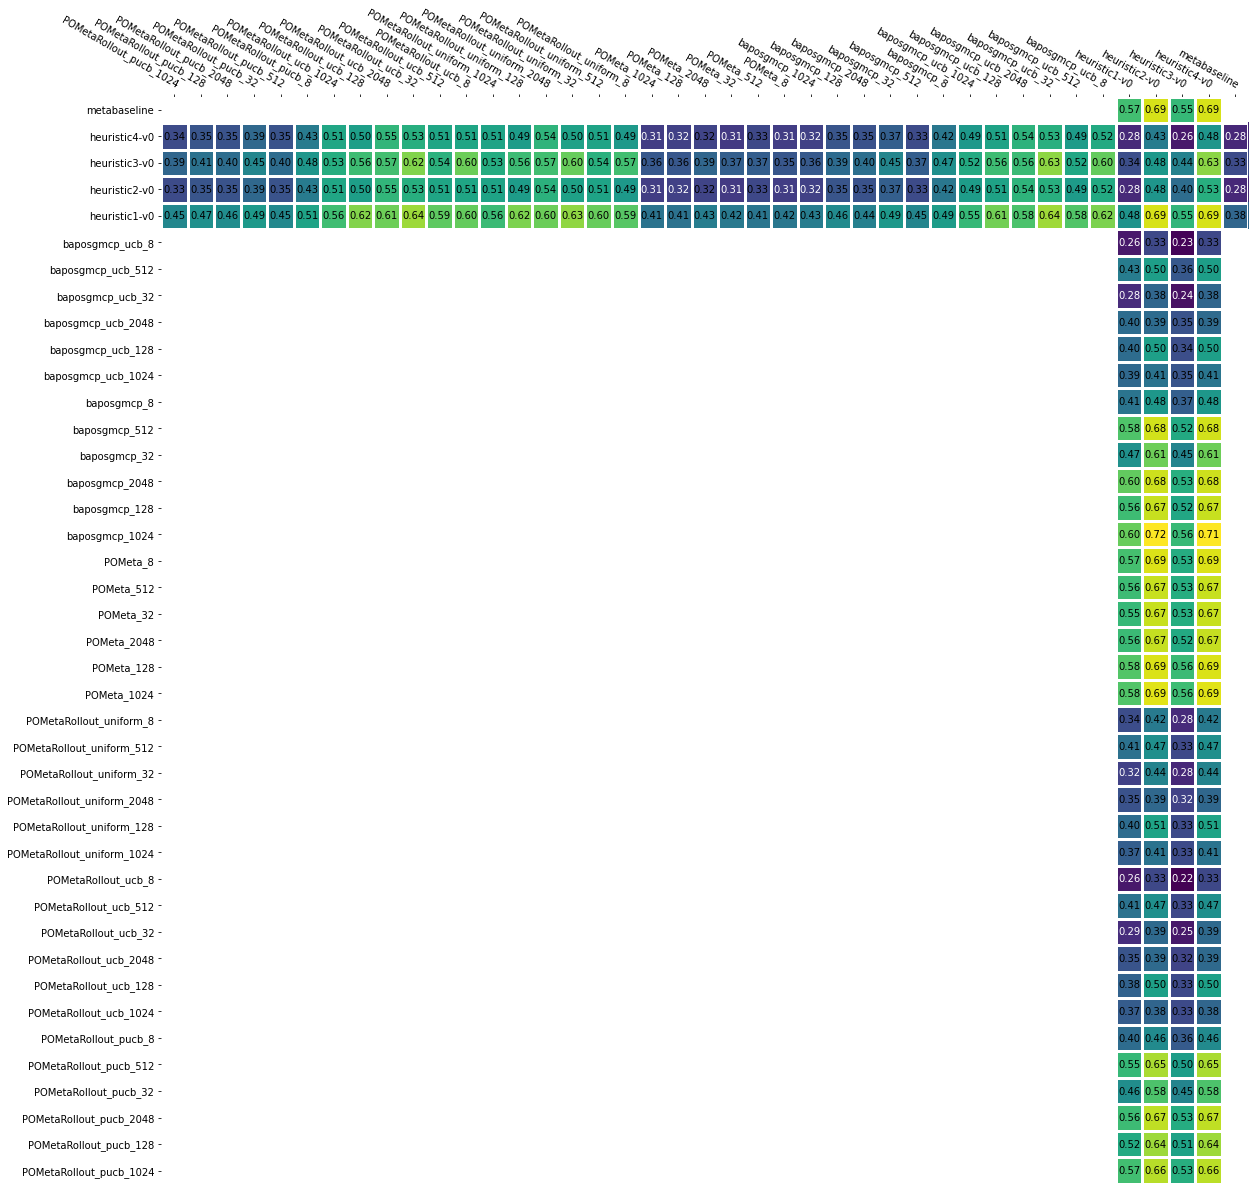

In [8]:
plot_utils.plot_pairwise_comparison(
    combined_df,
    y_key="episode_returns_mean", 
    policy_key="policy_id",
    y_err_key=None,   # See next plot
    vrange=None, 
    figsize=(20, 20), 
    valfmt="{x:.2f}",
    average_duplicates=True,
    duplicate_warning=False
)

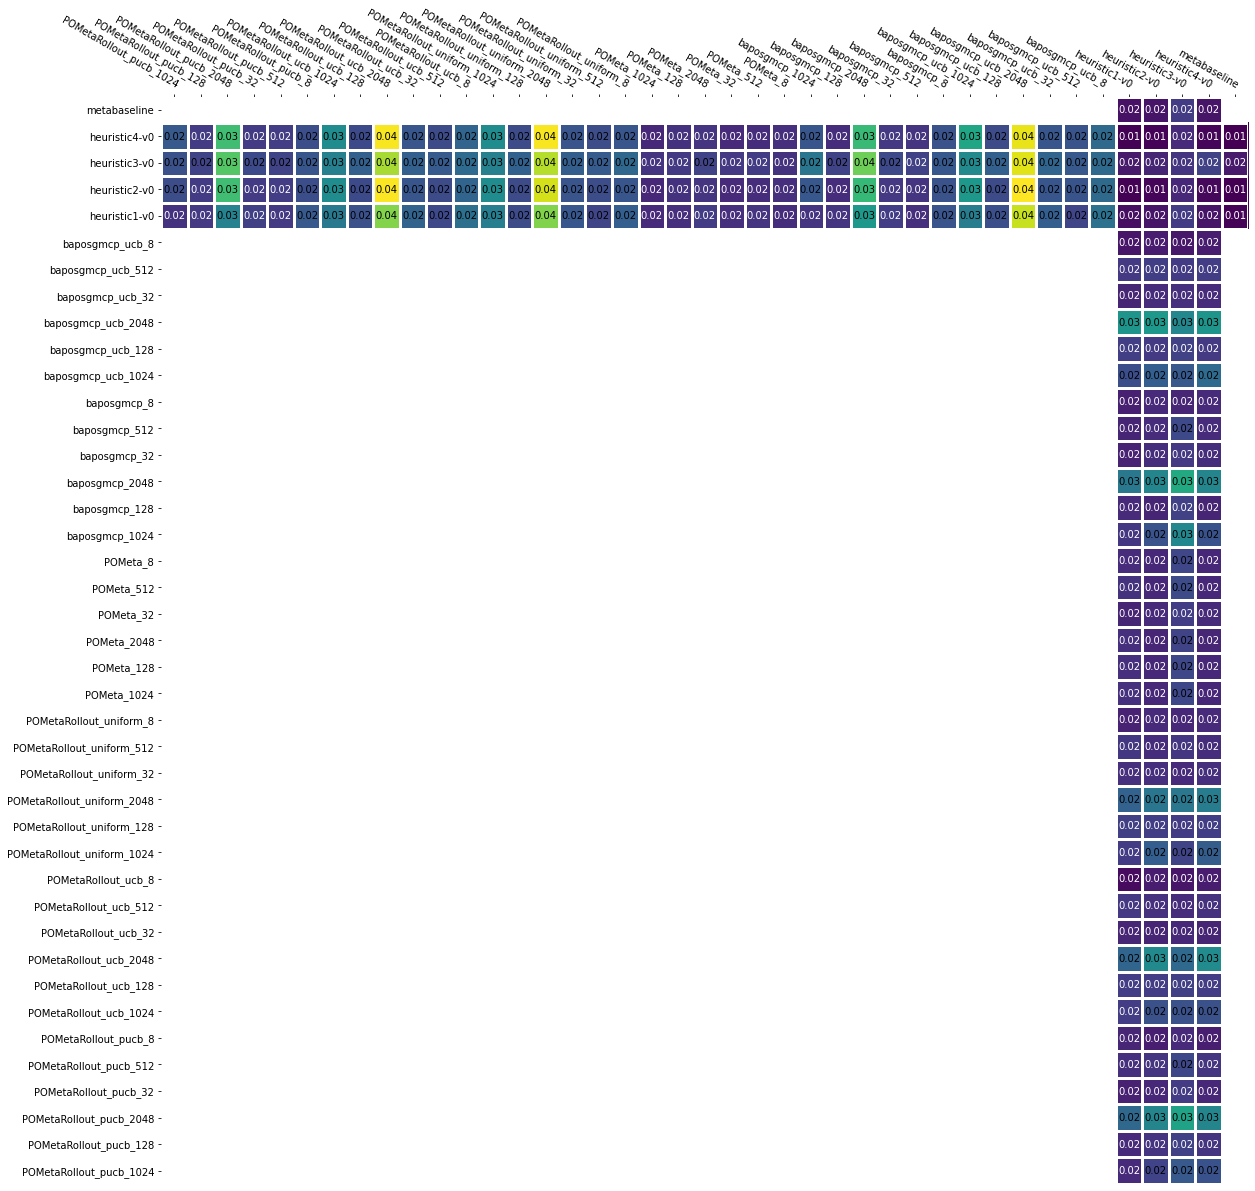

In [9]:
plot_utils.plot_pairwise_comparison(
    combined_df,
    y_key="episode_returns_CI", 
    policy_key="policy_id",
    y_err_key=None,
    vrange=None, 
    figsize=(20, 20), 
    valfmt="{x:.2f}",
    average_duplicates=True,
    duplicate_warning=False
)

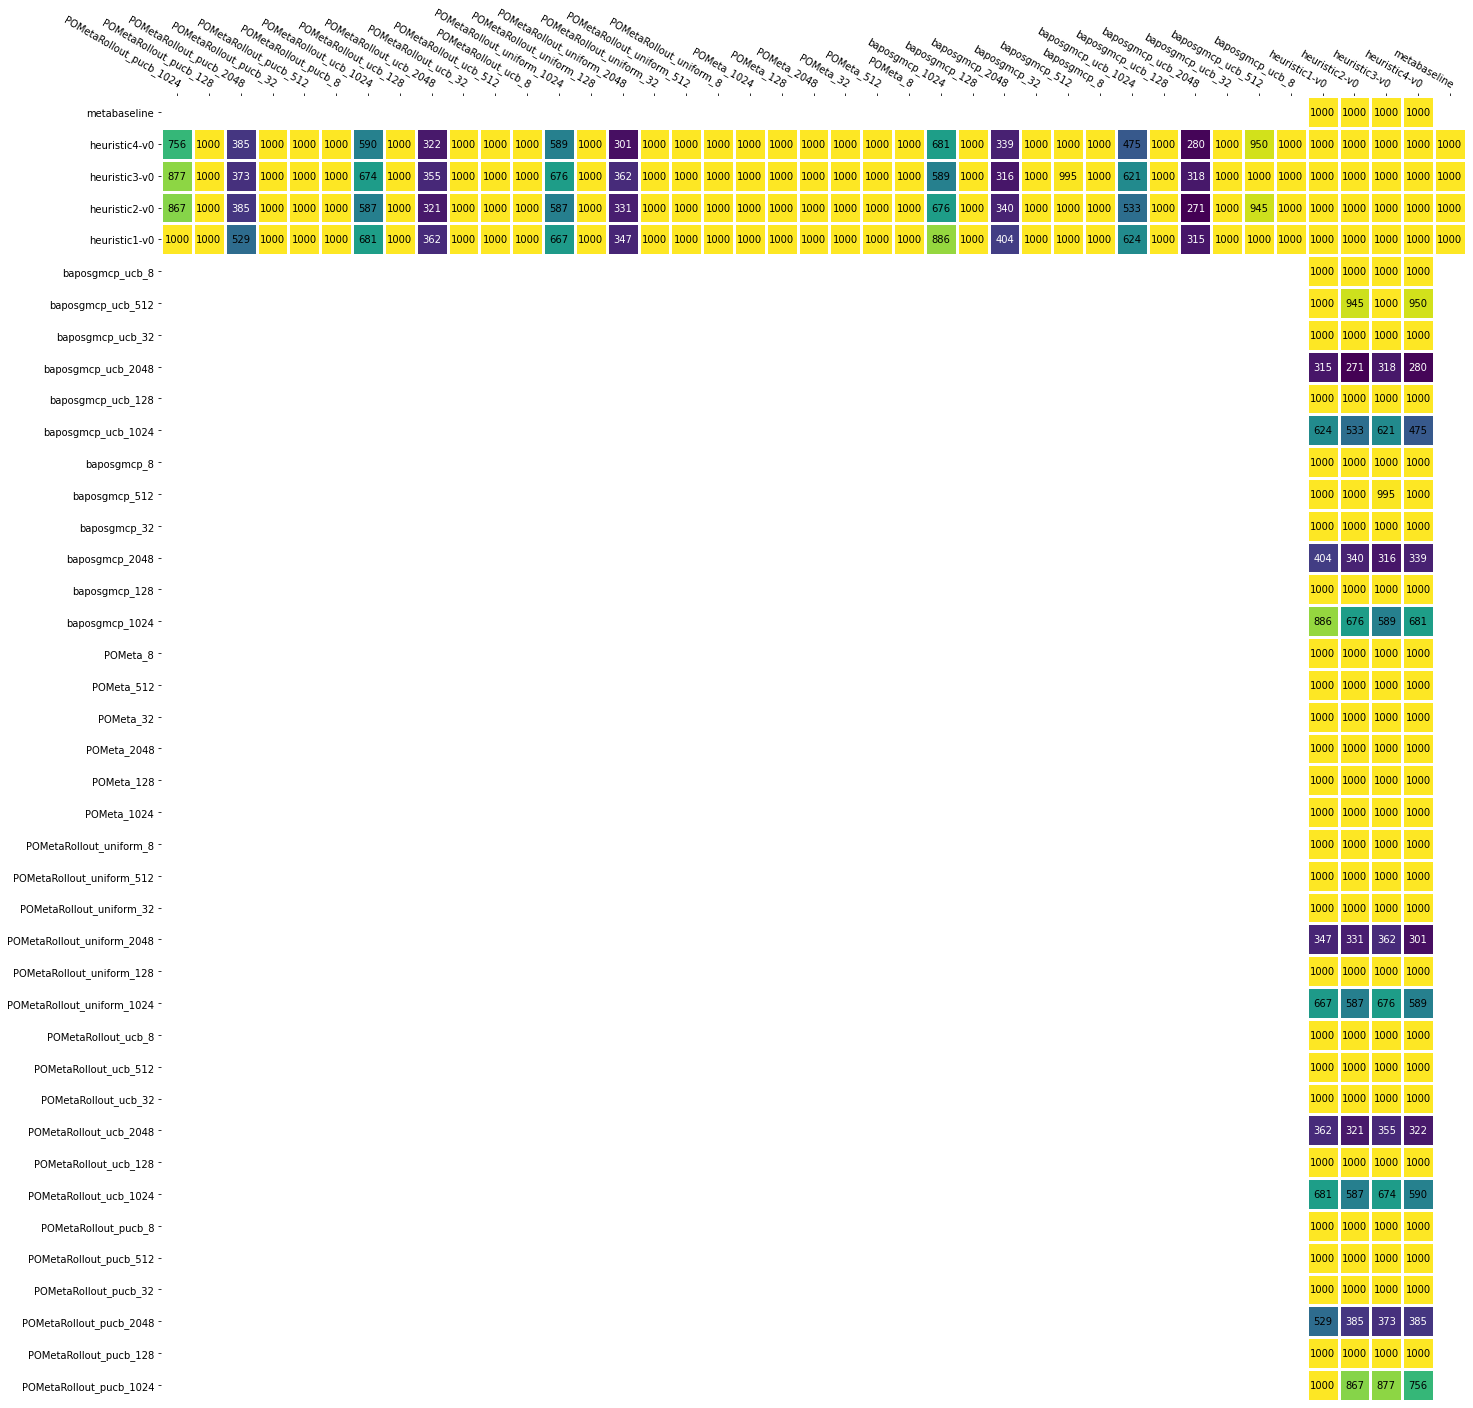

In [27]:
plot_utils.plot_pairwise_comparison(
    combined_df,
    y_key="num_episodes", 
    policy_key="policy_id",
    y_err_key=None,
    vrange=None, 
    figsize=(24, 24), 
    valfmt="{x:.0f}",
    average_duplicates=True,
    duplicate_warning=False
)

## Policy Prior Performance

Here we look at the expected performance against the policy prior of BAPOSGMCP.

In [34]:
policy_prior = {1: {
    "heuristic1-v0": 1/4,
    "heuristic2-v0": 1/4,
    "heuristic3-v0": 1/4,
    "heuristic4-v0": 1/4
}}

# Plot via num sims
policies_with_sims = [
    "POMetaRollout_pucb",
    "POMetaRollout_ucb",
    "POMetaRollout_uniform",
    "POMeta",
    "baposgmcp",
    "baposgmcp_ucb"
]

policies_without_sims = [
    "metabaseline"
]

In [43]:
def get_expected_values_by_num_sims(plot_df,
                                    y_key: str,
                                    y_err_key: str,
                                    policy_key: str,
                                    policy_prior):
    pw_values, policy_ids = plot_utils.get_pairwise_values(
        plot_df,
        y_key=y_key, 
        policy_key=policy_key,
        average_duplicates=True,
        duplicate_warning=False
    )
    pw_err_values, _ = plot_utils.get_pairwise_values(
        combined_df,
        y_key=y_err_key, 
        policy_key=policy_key,
        average_duplicates=True,
        duplicate_warning=False
    )

    expected_values = np.zeros(len(policy_ids))
    expected_err_values = np.zeros(len(policy_ids))
    for i, policy_id in enumerate(policy_ids):
        value = 0.0
        err_value = 0.0
        for coplayer_policy_id, prob in policy_prior[1].items():
            coplayer_idx = policy_ids.index(coplayer_policy_id)
            value += pw_values[i][coplayer_idx] * prob
            err_value += pw_err_values[i][coplayer_idx] * prob
        expected_values[i] = value
        expected_err_values[i] = err_value

    return expected_values, expected_err_values, policy_ids

def plot_expected_values_by_num_sims(y_key: str,
                                     expected_values,
                                     expected_err_values,
                                     policy_ids,
                                     policies_with_sims,
                                     policies_without_sims):
    values_by_policy = {}
    all_num_sims = set()
    for policy_prefix in policies_with_sims:
        values_by_policy[policy_prefix] = {"y": {}, "y_err": {}}
        for i, policy_id in enumerate(policy_ids):
            tokens = policy_id.split("_")
            if len(tokens) == 1 or "_".join(tokens[:-1]) != policy_prefix:
                continue
            num_sims = int(tokens[-1])
            value = expected_values[i]
            err_value = expected_err_values[i]
            values_by_policy[policy_prefix]["y"][num_sims] = value
            values_by_policy[policy_prefix]["y_err"][num_sims] = err_value
            all_num_sims.add(num_sims)

    all_num_sims = list(all_num_sims)
    all_num_sims.sort()

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,9))

    for policy_prefix in policies_with_sims:
        y_map = values_by_policy[policy_prefix]["y"]
        y_err_map = values_by_policy[policy_prefix]["y_err"]
        num_sims = list(y_map)
        num_sims.sort()

        y = np.array([y_map[n] for n in num_sims])
        y_err = np.array([y_err_map[n] for n in num_sims])

        ax.plot(num_sims, y, label=policy_prefix)
        plt.fill_between(num_sims, y-y_err, y+y_err,alpha=0.2)

    for policy_id in policies_without_sims:
        i = policy_ids.index(policy_id)
        value = expected_values[i]
        y_err = expected_err_values[i]

        y = np.full(len(all_num_sims), value)
        ax.plot(num_sims, y, label=policy_id)
        plt.fill_between(num_sims, y-y_err, y+y_err,alpha=0.2)

    ax.set_ylabel(y_key)
    ax.set_xlabel("num sims")
    ax.legend()
    plt.show()
            
        
def get_and_plot_expected_values_by_num_sims(plot_df,
                                             y_key: str,
                                             y_err_key: str,
                                             policy_key: str,
                                             policy_prior,
                                             policies_with_sims,
                                             policies_without_sims):
    expected_values, expected_err_values, policy_ids = get_expected_values_by_num_sims(
        plot_df,
        y_key=y_key,
        y_err_key=y_err_key,
        policy_key=policy_key,
        policy_prior=policy_prior
    )
    plot_expected_values_by_num_sims(
        y_key=y_key,
        expected_values=expected_values,
        expected_err_values=expected_err_values,
        policy_ids=policy_ids,
        policies_with_sims=policies_with_sims,
        policies_without_sims=policies_without_sims
    )

In [31]:
expected_mean_returns_values, expected_mean_returns_err_values, policy_ids = get_expected_values_by_num_sims(
    combined_df,
    y_key="episode_returns_mean",
    y_err_key="episode_returns_CI",
    policy_key="policy_id",
    policy_prior=policy_prior
)
for i, policy_id in enumerate(policy_ids):
    value = expected_mean_returns_values[i]
    err_value = expected_mean_returns_err_values[i]
    print(f"{policy_id} = {value:.2f} +/- {err_value:.2f}")

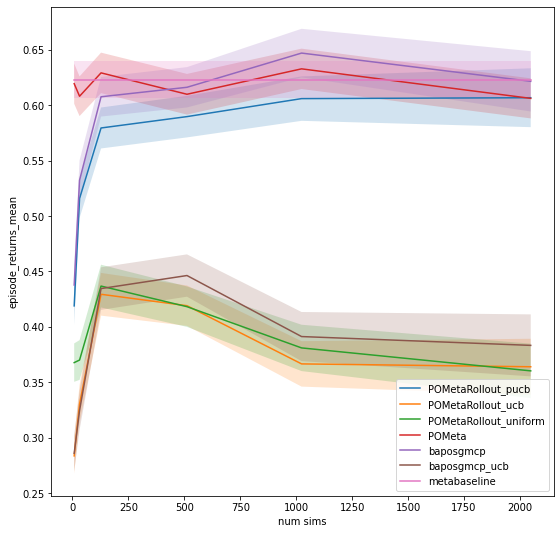

In [37]:
plot_expected_values_by_num_sims(
    y_key="episode_returns_mean",
    expected_values=expected_mean_returns_values,
    expected_err_values=expected_mean_returns_err_values,
    policy_ids=policy_ids,
    policies_with_sims=policies_with_sims,
    policies_without_sims=policies_without_sims
)

In [38]:
expected_min_returns_values, expected_min_returns_err_values, policy_ids = get_expected_values_by_num_sims(
    combined_df,
    y_key="episode_returns_min",
    y_err_key="episode_returns_CI",
    policy_key="policy_id",
    policy_prior=policy_prior
)
for i, policy_id in enumerate(policy_ids):
    value = expected_min_returns_values[i]
    err_value = expected_min_returns_err_values[i]
    print(f"{policy_id} = {value:.2f} +/- {err_value:.2f}")

POMetaRollout_pucb_1024 = 0.00 +/- 0.02
POMetaRollout_pucb_128 = 0.00 +/- 0.02
POMetaRollout_pucb_2048 = 0.00 +/- 0.03
POMetaRollout_pucb_32 = 0.00 +/- 0.02
POMetaRollout_pucb_512 = 0.00 +/- 0.02
POMetaRollout_pucb_8 = 0.00 +/- 0.02
POMetaRollout_ucb_1024 = 0.00 +/- 0.02
POMetaRollout_ucb_128 = 0.00 +/- 0.02
POMetaRollout_ucb_2048 = 0.00 +/- 0.03
POMetaRollout_ucb_32 = 0.00 +/- 0.02
POMetaRollout_ucb_512 = 0.00 +/- 0.02
POMetaRollout_ucb_8 = 0.00 +/- 0.02
POMetaRollout_uniform_1024 = 0.00 +/- 0.02
POMetaRollout_uniform_128 = 0.00 +/- 0.02
POMetaRollout_uniform_2048 = 0.00 +/- 0.02
POMetaRollout_uniform_32 = 0.00 +/- 0.02
POMetaRollout_uniform_512 = 0.00 +/- 0.02
POMetaRollout_uniform_8 = 0.00 +/- 0.02
POMeta_1024 = 0.00 +/- 0.02
POMeta_128 = 0.00 +/- 0.02
POMeta_2048 = 0.00 +/- 0.02
POMeta_32 = 0.00 +/- 0.02
POMeta_512 = 0.00 +/- 0.02
POMeta_8 = 0.00 +/- 0.02
baposgmcp_1024 = 0.00 +/- 0.02
baposgmcp_128 = 0.00 +/- 0.02
baposgmcp_2048 = 0.06 +/- 0.03
baposgmcp_32 = 0.00 +/- 0.02
baposgm

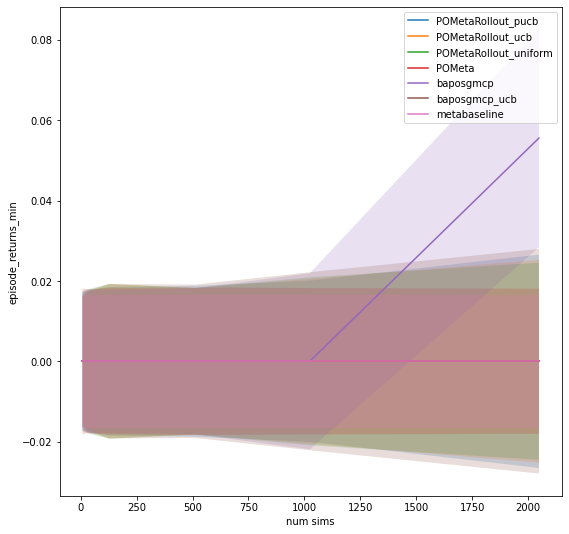

In [39]:
plot_expected_values_by_num_sims(
    y_key="episode_returns_min",
    expected_values=expected_min_returns_values,
    expected_err_values=expected_min_returns_err_values,
    policy_ids=policy_ids,
    policies_with_sims=policies_with_sims,
    policies_without_sims=policies_without_sims
)

## Looking at time

   - search_time
   - update_time
   - reinvigoration_time
   - policy_calls
   - inference_time
   - search_depth

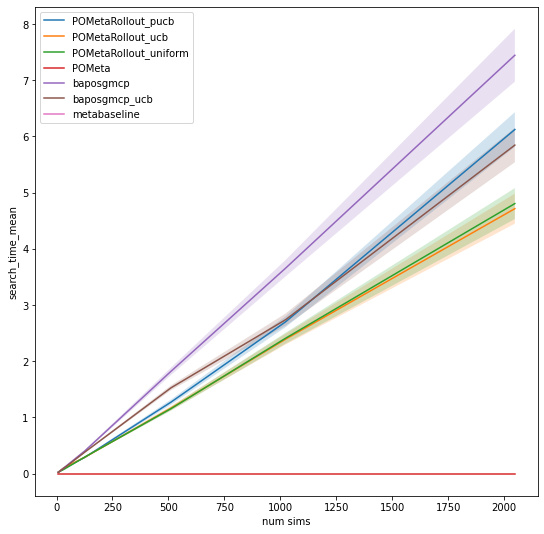

In [44]:
get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="search_time_mean",
    y_err_key="search_time_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_sims,
    policies_without_sims=policies_without_sims
)

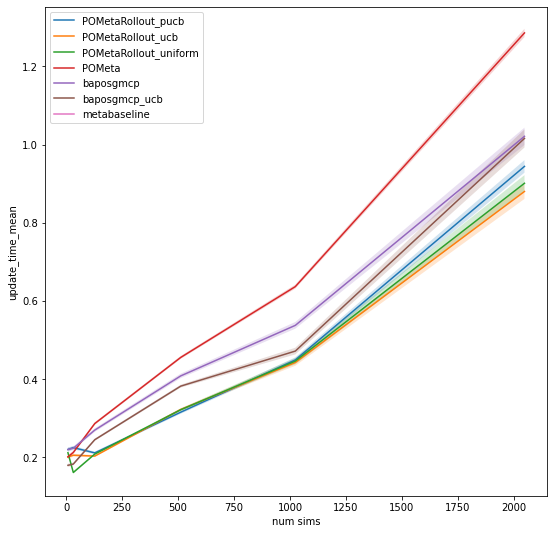

In [45]:
get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="update_time_mean",
    y_err_key="update_time_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_sims,
    policies_without_sims=policies_without_sims
)

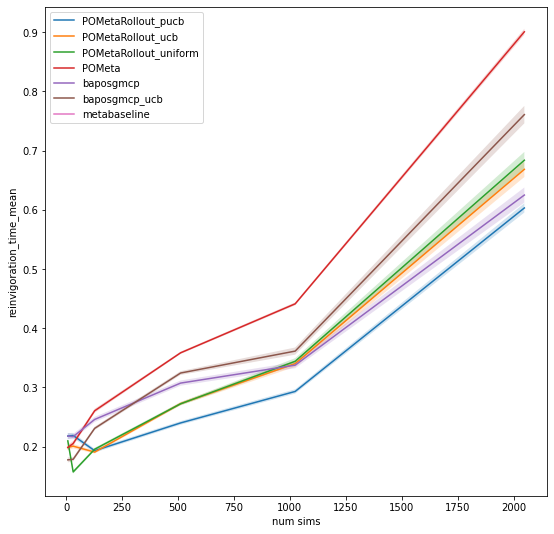

In [46]:
get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="reinvigoration_time_mean",
    y_err_key="reinvigoration_time_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_sims,
    policies_without_sims=policies_without_sims
)

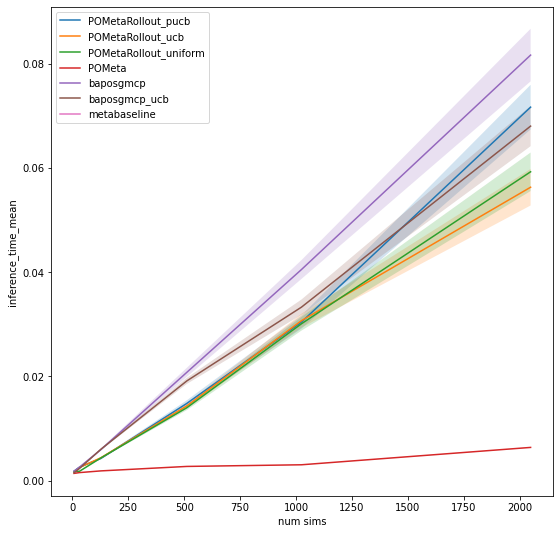

In [47]:
get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="inference_time_mean",
    y_err_key="inference_time_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_sims,
    policies_without_sims=policies_without_sims
)

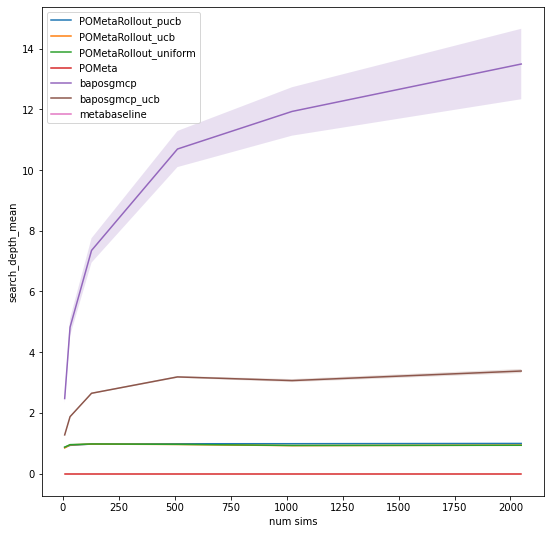

In [48]:
get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="search_depth_mean",
    y_err_key="search_depth_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_sims,
    policies_without_sims=policies_without_sims
)